<a href="https://www.kaggle.com/code/ramsesmdlc/titanic-linear-regression-model?scriptVersionId=123090404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Type of machine learning system to build:
    #1. Supervised Learning.
    #2. Batch Learning (also called "offline learning").
    #3. Model-based learning.

#Python Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
from pandas.plotting import scatter_matrix # data visualization

from sklearn.model_selection import train_test_split # Machine Learning - split dataset (train/test)
from sklearn.preprocessing import OrdinalEncoder # Machine Learning (clean data) - Encoder Categorical Attributes
from sklearn.preprocessing import OneHotEncoder # Machine Learning (clean data)- OneHot Encoder Categorical Attributes

# __1. Loading the Data__

Showing only the first ten rows of the Data (the first row is the head, and the following rows are data points).

In [2]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# __2. Exploring the Data__

# __2.1. Looking at the Data Structure__

## __2.1.1. Getting information/description of data__:
1. Number of rows and columns
2. Number and names of features' type (float64, int64, object)
3. Number of non-null values
4. Name of features

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Dictionary

1. survival - Survival (0 = No, 1 = Yes)
2. pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex - Sex 
4. Age - Age in years
5. sibsp - number of siblings / spouses aboard the Titanic.
        5.1. Sibling = brother, sister, stepbrother, stepsister.
        5.2. Spouse = husband, wife (mistresses and fiancés were ignored).
6. parch - number of parents / children aboard the Titanic. The dataset defines family relations in this way:
        6.1. Parent = mother, father
        6.2. Child = daughter, son, stepdaughter, stepson
        6.3. Some children travelled only with a nanny, therefore parch=0 for them.
7. ticket - Ticket number
8. fare - Passenger fare
9. cabin - Cabin number
10. embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## __2.1.2. Categories that exist in a feature__:

After checking the first rows of data, we know the following about the features "Sex" and "Embarked":
1. They are categorical attributes (object)
2. They have repetitive values
3. They have several categories

After checking the first rows of data, we know the following about the features "Pclass", "SibSp", and "Parch":
1. They are categorical attributes (int64)
2. They have repetitive values
3. They have several categories

In [4]:
#Categories in a feature.
training_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
#Categories in a featuree.
training_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
#Categories in a feature.
training_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
#Categories in a feature.
training_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
#Categories in a feature.
training_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## __2.1.3. Summary of numerical attributes__:

In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)

In [9]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## __2.1.4. Summary of numerical attributes (in a graph way)__:

Histograms are built for each numerical attribute (showing the number of instances on the vertical axis that a given value ranges in the horizontal axis).

The data have not been scaled or capped. 

> There are no preprocessed attributes.

Be careful of tail-heavy histograms, and how we can transform them into more bell-shaped distributions.

<function matplotlib.pyplot.show(close=None, block=None)>

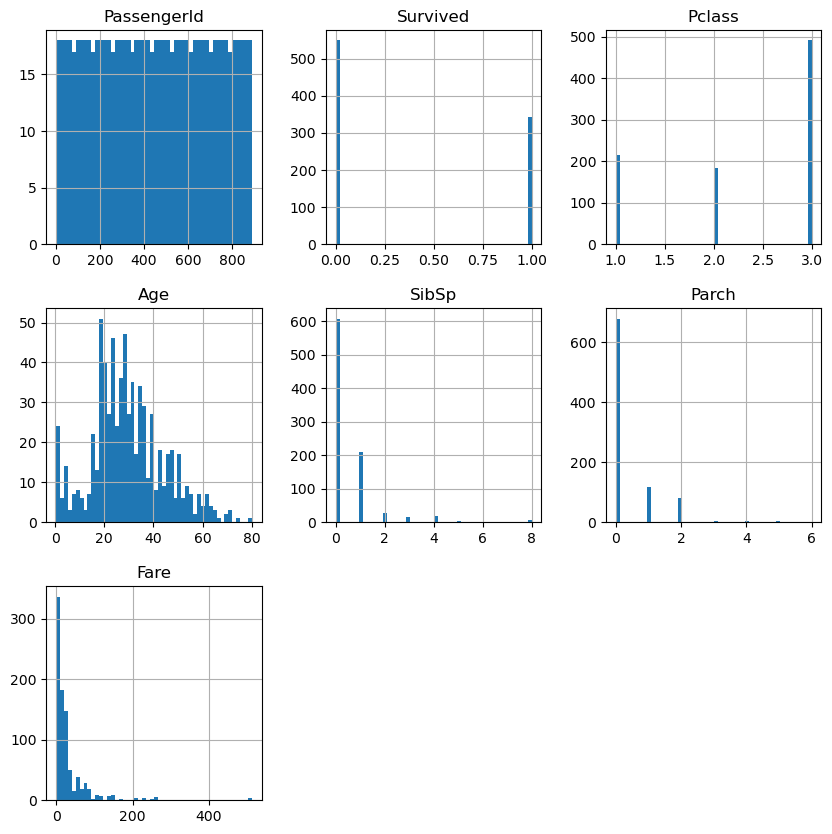

In [10]:
#The function "Figsize" is used for adjusting the size values of a graph (x,y).

#Dataframe.plot

training_data.hist(bins= 50, figsize = (10,10))
plt.show

# __3. Creating a Test Set__

Although this competition has a separate Test Set, I have decided to set aside from the "Training Set" another "Test Set". It is theoretically simple picking 20% of the dataset.

There are a couple of ways to create a Test Set. They are the followings:
1. Option 1: shuffling indices and then splitting data randomly.

> <span style="color:black">__Caution:__</span> This option (purely random sampling) is appropriate if the dataset is large enough relative to the number of attributes.

> No established "random number generator seed" to generate the same shuffled indices for the Test Set could be a problem. With this function, the generation of different Test Sets every time we run is avoided.

> It could be problematic if the dataset is updated. Maintaining stable the "training and test data" after the dataset is updated is achievable if we establish identifiers for the data points that will be part of the training and test set. <-- <span style="color:black">__It is NOT DONE in this Notebook.__</span> 
        

2. Option 2: Using the Scikit Learn function to split data randomly.

> <span style="color:black">__Caution:__</span> This option (purely random sampling) is appropriate if the dataset is large enough relative to the number of attributes.

> This function allows splitting the data into training data and a test set. In addition, it has the parameter to set the "random number generator seed" called "random_state"

3. Option 3: Using the "Scikit Learn" function to split the data in a stratified way. <-- <span style="color:black">__It is NOT DONE in this Notebook.__</span> 

> <span style="color:black">__Caution:__</span> This option (stratified sampling) is appropriate if the dataset is not large enough relative to the number of attributes; therefore, it is avoided the risk of sampling bias.

> The purpose of this is to split the entire dataset into homogeneous groups. Then from those groups, we sample the right amount of items that represent each of them fairly. Finally, those samples are going to be part of the Test Set (i.e., the Test Set is going to have representative data from each group of the entire dataset).

> Do not forget to deal with or preprocess NA values before applying this procedure.

### Developing Option 1 (shuffling indices and then splitting data randomly.)

In [11]:
#"random number generator seed"
np.random.seed(66)

#Function to split the dataset 
    #The role of indices in this function is relevant. 
    #np.random.permutation(x): Randomly permute a sequence, or return a permuted range. 
        #If x is a multi-dimensional array, it is only shuffled along its first index.
        #If x is an array, make a copy and shuffle the elements randomly.
    #iloc: integer-location based indexing for selection by position.
        #Indexing just the rows that belong to the "training set" and "test set"
    
def split_dataset(dataset, test_ratio):
    shuffled_indices_dataset = np.random.permutation(len(dataset))
    size_of_test_set = int(len(dataset)*test_ratio)
    indices_of_test_set = shuffled_indices_dataset[:size_of_test_set]
    indices_of_train_set = shuffled_indices_dataset[size_of_test_set:]
    return dataset.iloc[indices_of_train_set], dataset.iloc[indices_of_test_set]

In [12]:
#Executing the function to split the dataset
    #Assumption: 20% of data will be for the test set (ratio =0.2)
    #The newly created and returned index will help build the training set and test set.
    
train_set2, test_set2 = split_dataset(training_data, 0.2)

#Printing the "len" of the new training set (version 2)
len(train_set2)

713

In [13]:
#Printing the "len" of the new test set (version 2)
len(test_set2)

178

In [14]:
#Printing a couple of rows of the new training set (version 2)
train_set2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C


In [15]:
#Printing a couple of rows of the new test set (version 2)
test_set2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S


### Developing Option 2 (Using the Scikit Learn function to split data randomly)

In [16]:
#Executing the function to split the dataset
    #Assumption: 20% of data will be for the test set (ratio =0.2)
    #In this function, shuffle by default is True.
    #Save plenty of time!

train_set3, test_set3 = train_test_split(training_data, test_size = 0.2, random_state = 66)

#Printing the "len" of the new training set (version 3)
len(train_set3)

712

In [17]:
#Printing the "len" of the new test set (version 3)
len(test_set3)

179

In [18]:
#Printing a couple of rows of the new training set (version 3)
train_set3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


In [19]:
#Printing a couple of rows of the new test set (version 3)
test_set3.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S


# __4. Visualize the Data__

This process is helpful to gain insights about the training data.
> While large training datasets have to be sampled for the visualization stage, small training datasets like ours can be entirely explored.

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

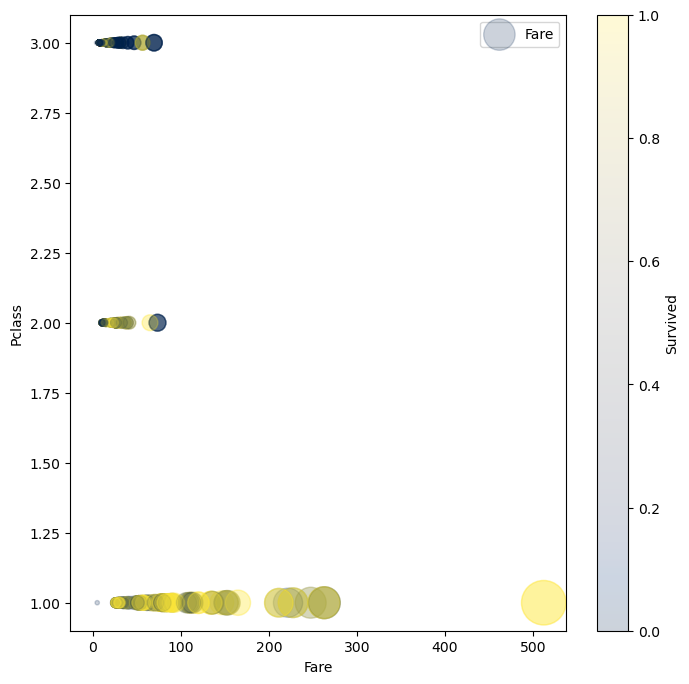

In [20]:
#In this scenario, the original "training set" given by this Kaggle problem is used

#Dataframe.plot

#Some relevant arguments of "Dataframe.plot" function are the followings:
    #s: The marker size (radius of each circle of the scatterplot. In this case, the bigger the circle, the bigger the Fare.
    #c: The marker colors (represents if the passenger survived or not)
    #alpha: The alpha blending value, between 0 (transparent) and 1 (opaque). This argument allows us to see the intersection between data points of the scatterplot.
    #colorbar: This bar works like a guide for the user. It is a very helpful complement to the "c" and "cmap" arguments.
    #cmap: The colormap. There are several ways to deal with this argument.
        #Option 1:
            #Using the function "mpl.colors.ListedColormap([,])"
            #The function "mpl.colors.ListedColormap([,])" needs to load the following:
                #Library: matplotlib
                #Alias: mpl
        #Option 2: Preferred!
            #Using the function "matplotlib.pyplot.get_cmap(name=None, lut=None)"
            #The function "get_cmap" uses information previously loaded, such as:
                #Library: matplotlib
                #Module: pyplot
                #Alias: plt
        #To know more about the function "get_cmap", see the following markdown
training_data.plot(kind= "scatter", x="Fare", y="Pclass", s=2*training_data["Fare"], figsize = (8,8), c="Survived", cmap= plt.get_cmap("cividis"), label = "Fare", colorbar=True ,alpha= 0.2)

> Detailed information about how the function "get_cmap" works (arguments, etc.)

<a href="https://matplotlib.org/stable/api/cm_api.html#module-matplotlib.cm">Matplotlib link about Return a color map specified through cmap.</a>


> Detailed information about the argument "colormap" chosen: Sequential (to be specific: "cividis")

<a href="https://matplotlib.org/stable/gallery/color/colormap_reference.html">Matplotlib link about Colormap Reference</a>

<a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">Matplotlib link about Choosing Colormaps in Matplotlib</a>

## __4.1. Looking for correlations (in numerical attributes)*__

### __4.1.1. Correlation(Standard Correlation Coefficient)__

This process is helpful to gain insights about the training data.

1. "Compute the Standard Correlation Coefficient" (i.e., Pearson's Correlation Coefficient {r}) between the numerical attributes of our dataset. When the "Standard Correlation Coefficient" is used it is important to be aware of the following points:

> It only measures "linear correlation".

> It ranges from -1 to 1.

> The values of r=1 and r=-1 show a strong linear correlation between the variables.

> Negative linear correlation (from r=0 to r=-1) means one attribute goes up, then the other attribute goes down.

> Positive linear correlation (from r=0 to r=1) means one attribute goes up, then the other attribute also goes up.

> The value of r=0 shows a no linear correlation between the variables.

Options to "Compute the Standard Correlation Coefficient":

> Option 1: Compute the "Standard Correlation Coefficient" of all numerical attributes of our dataset between each other.

> Option 2 (more efficient way): "Compute the Standard Correlation Coefficient" of all numerical attributes of our dataset against an interesting attribute (i.e. the "target value" that we want to predict using the Test Set).

In [21]:
#Applying Option 1

#Interesting outputs (correlations): "Survived vs Pclass", "Survived vs Fare","Pclass vs Fare","Pclass vs Age", "Age vs SipSp", "SibSp vs Parch", "Parch vs Age", and Parch vs Fare".
correlation_matrix = training_data.corr()

correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:
#Applying Option 2

#Interesting outputs (correlations): "Survived vs Pclass" and "Survived vs Fare"

correlation_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

### __4.1.2. Correlation (using graphs)__

This process is helpful to gain insights about the training data.

1. "Graphical Correlation between the numerical attributes" of our dataset.  When it is used, could be wortwhile to be aware of the followings points:

> If you have a large number of numerical attributes, select only the most promising ones for this process, using as a guide the outputs of section 4.1.1 (Correlation - Standard Correlation Coefficient.) Otherwise we are going to get a graphical mess (do not forget that "the number of plots" = "number of attributes squared").

> If we are dealing with attributes that have tail-heavy distribution {according to the section 2.1.4. Summary of numerical attributes (in a graph way)}, transform those attributes before the "Graphical Correlation Procedure" could be helpful.

> Quirky data points can be spotted during the process of "Graphical Correlation". Clean quirky data points after the process of "Graphical Correlation" might be helpful for the performance of the model during the test phase.

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

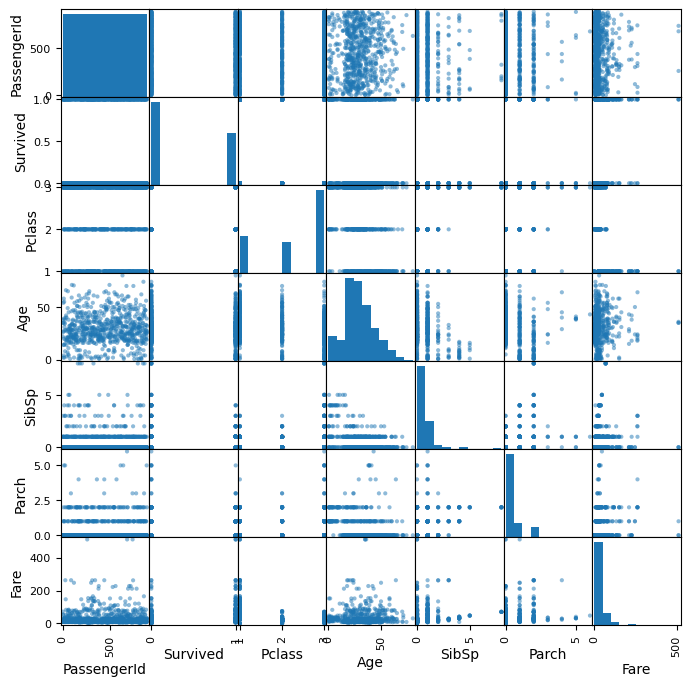

In [23]:
#Graphical Correlation between all the numerical attributes of our trainig set
scatter_matrix(training_data, figsize=(8,8))

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

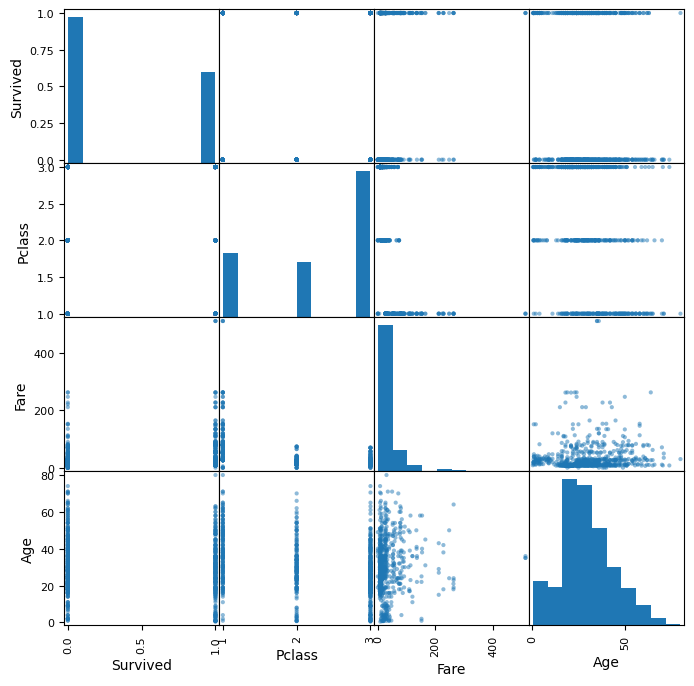

In [24]:
#Plotting the correlation between the most promising numerical attributes of our training set.
interest_attributes = ["Survived", "Pclass", "Fare", "Age"]

scatter_matrix(training_data[interest_attributes], figsize=(8,8))

## __4.2. Attribute Combinations__

Basically, this is the last step in the process of gain insights about the training data.

We can create "new attributes" from the combinations of the most promising existing attributes. The "new attributes" could came from the helpful insights that we have seen in the section "4.1. Looking for correlations (in numerical attributes)".
> If we want to know how good are those "new attributes", we can compute the "Standard Correlation Coefficient" (i.e., Pearson's Correlation Coefficient {r}) against an interesting attribute (i.e. the "target value" that we want to predict using the Test Set).

According to the performance of the model in the Test Set we can assses if it is wortwhile to use new attribute combinations (i.e., it is an iterative process.)

In [25]:
#Training dataset (original dataframe)
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
#Highly recommended: Before applying "attribute combination" do a copy of the original training dataset.
#We are agoing to add some columns to original dataframe; therefore a dataframes's copy is very useful.

training_data2 = training_data.copy()
training_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
#New attributes (that will be added as columns to the training set {i.e. added to existing dataframe}).

training_data2["class per fare"]= training_data2["Pclass"]/training_data2["Fare"]
training_data2["number of parents / children per number of siblings / spouses"]= training_data2["SibSp"]/training_data2["Parch"]

In [28]:
#We can see interesting outputs (i.e., correlations) between the "old attributes" and "newly created attributes". 

correlation_matrix2 = training_data2.corr()
correlation_matrix2["Survived"].sort_values(ascending = False)

Survived                                                         1.000000
Fare                                                             0.257307
Parch                                                            0.081629
PassengerId                                                     -0.005007
SibSp                                                           -0.035322
Age                                                             -0.077221
class per fare                                                  -0.325686
Pclass                                                          -0.338481
number of parents / children per number of siblings / spouses   -0.368222
Name: Survived, dtype: float64

In [29]:
#Information or description of the "newly created attributes". 
training_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   PassengerId                                                    891 non-null    int64  
 1   Survived                                                       891 non-null    int64  
 2   Pclass                                                         891 non-null    int64  
 3   Name                                                           891 non-null    object 
 4   Sex                                                            891 non-null    object 
 5   Age                                                            714 non-null    float64
 6   SibSp                                                          891 non-null    int64  
 7   Parch                                                         

<AxesSubplot:xlabel='number of parents / children per number of siblings / spouses', ylabel='Survived'>

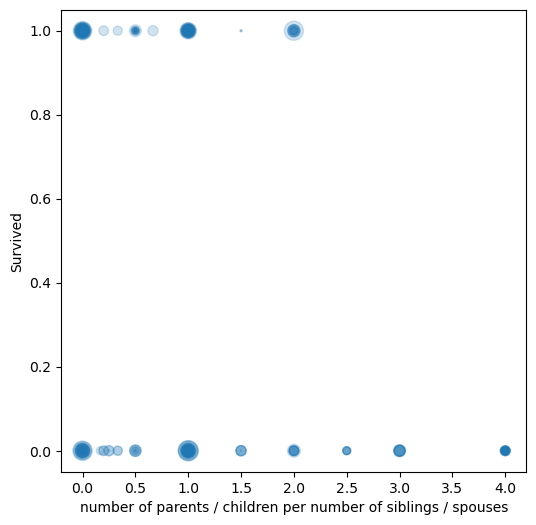

In [30]:
#Plotting the correlation between the newly attribute created and the target value (Survived)

#The newly attribute in the plot is "number of parents / children per number of siblings / spouses"

training_data2.plot(kind="scatter", x="number of parents / children per number of siblings / spouses", y="Survived", s=500*training_data2["class per fare"], figsize = (6,6), alpha=0.2)

<AxesSubplot:xlabel='class per fare', ylabel='Survived'>

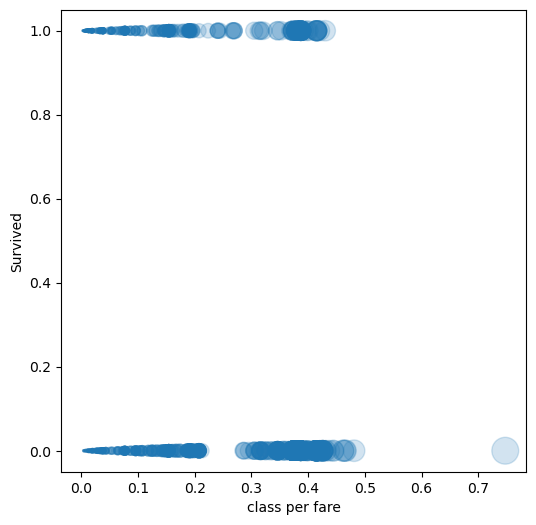

In [31]:
#Plotting the correlation between the newly attribute created and the target value (Survived)

#The newly attribute in the plot is "class per fare"

training_data2.plot(kind="scatter", x="class per fare", y="Survived", s=500*training_data2["class per fare"], figsize = (6,6), alpha=0.2)

In [32]:
#New training set dataframe (including the new columns).
training_data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.033333,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.127932,0.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.033333,NaN


# __5. Preparing the data__

## __5.1. Data Cleaning__

From section "2.1.1. Getting information/description of data" we know which attributes have NA values. To be specific they are the followings:
> Age (numerical attribute)

> Cabin

> Embarked

Four options to deal with NA values in "Numerical Attributes" are the followings:
1. Option 1: The dropna() method removes the rows that contains null values. 

> The dropna() method returns a new dataframe object unless the "inplace" parameter is set to True, in that case the dropna() method does the removing in the original datadrame instead.

> The "subset" parameter specifies where (column) to look for NULL values.

2. Option 2: The "drop()" function is a drastic method in constrast with "dropna().

> The first argument are the labels or indexes to drop. If more than one, specify them in a list. 

> The "axis" parameter: allow us to establish which axis to check (1 for columns or 0 for rows).

3. Option 3: The "fillna()" method replaces the null values with a specified value. 

In [33]:
#Option 1
training_data21 = training_data2.copy()

training_data21.dropna(subset=["Age"], inplace=True)

training_data21

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0.103004,0.0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.033333,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.033333,NaN


In [34]:
#Option 2
training_data22 = training_data2.copy()

training_data22.drop("Age", axis=1, inplace=True)

training_data22

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,0.033333,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,0.127932,0.5
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,0.033333,NaN


In [35]:
#Option 3
training_data23 = training_data2.copy()

#We choose to fill NaN values with the "median value"of the attribute "Age"
medianvalue = training_data23["Age"].median()
training_data23["Age"].fillna(medianvalue, inplace=True)

training_data23

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,class per fare,number of parents / children per number of siblings / spouses
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.413793,inf
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.014029,inf
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.378549,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.018832,inf
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.372671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.153846,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.033333,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0.127932,0.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.033333,NaN


## __5.2. Dealing with Text and Categorical Attributes__

Until now we have seen only how to get insights of "numerical attributes", In the following lines we are going to see how to deal with "text and categorical attributes" considering that most ML algorithms use to work better with numeric values only. 

Based in what we described in the previous lines, we are going to transform or encode" the text or categories into numbers. Just to check:

> The "categorical attributes" in our training data set are: "Sex" and "Embarked".

> The "text attributes" in our training data set are: "Name", "Ticket", "Cabin".

This process works very well when attributes has a limited number of possible categories.

In [36]:
#Printing the categorical attribute "Sex" as a dataframe.
training_data_cat1 = training_data[["Sex"]]
training_data_cat1

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [37]:
#Printing the categorical attribute"Embarked" as a dataframe.

training_data_cat2 = training_data[["Embarked"]]
training_data_cat2

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


### __5.2.1. Quick review about some relevant Scikit Learn commands and concepts__

1. Estimators = Its main goal is to estimate some parameters based on the dataset..

2. Transformers = The method "transform()" allow us to transform a dataset.

> The argument of this function is the dataset. The output is the transformed dataset.

> It has a convenience method called "fit_transform()" equivalent to calling "fit()" and "transform()".

3. Predictors

4. Inspection

5. Nonproliferation of classes

6. Composition

7. Sensible defaults

In [38]:
#The function "OrdinalEncoder()" encode categorical features as an integer array (0 to n_categories - 1).

#Explanation of fit(), fit_transform() and transform()...

ordinal_encoder1 = OrdinalEncoder()
training_data_cat1_encoded = ordinal_encoder1.fit_transform(training_data_cat1)
training_data_cat1_encoded[0:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [39]:
ordinal_encoder1.categories_

[array(['female', 'male'], dtype=object)]

In [40]:
ordinal_encoder2 = OrdinalEncoder()
training_data_cat2_encoded = ordinal_encoder2.fit_transform(training_data_cat2)
training_data_cat2_encoded[0:10]

array([[2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.]])

In [41]:
ordinal_encoder2.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

In [42]:
OneHot_encoder1 = OneHotEncoder()
training_data_cat1_OneHotencoded = OneHot_encoder1.fit_transform(training_data_cat1)
training_data_cat1_OneHotencoded

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [43]:
training_data_cat1_OneHotencoded.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [44]:
OneHot_encoder2 = OneHotEncoder()
training_data_cat2_OneHotencoded = OneHot_encoder2.fit_transform(training_data_cat2)
training_data_cat2_OneHotencoded

<891x4 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [45]:
training_data_cat2_OneHotencoded.toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

<span style="color:red">__IMPORTANT: THIS IS AN UNFINISHED NOTEBOOK__"</span>

I am still working on the following items:
1. ...
2. ...
3. ...
4. ...
5. ...
6. Feature scaling
7. Transformation pipelines
8. Training and evaluating the training set (Cross Validation)
9. Tuning the model
10. Evaluate the Test Set